## Импортирование и настройка необходимых библиотек

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

## Считывание датасета

In [88]:
df = pd.read_csv(r'C:\Users\Rasim\Desktop\DataAnalysis\DataSets\ORGANICS.csv')
display(df)
print(df.columns)
print(df['TargetAmt'].unique())

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,0,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,0,0


Index(['ID', 'DemAffl', 'DemAge', 'DemCluster', 'DemClusterGroup', 'DemGender',
       'DemReg', 'DemTVReg', 'PromClass', 'PromSpend', 'PromTime', 'TargetBuy',
       'TargetAmt'],
      dtype='object')
[0 1 2 3]


## Препроцессинг данных

### Удаление бесполезных колонок

In [89]:
data = df.drop(columns=['ID', 'TargetAmt'])
display(data)

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0
1,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0
2,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1
3,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1
4,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...
22218,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,0
22219,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,0
22220,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0
22221,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,0


### Обработка пропущенных значений

In [90]:
print(data.isnull().sum())

DemAffl            1085
DemAge             1508
DemCluster          674
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
PromClass             0
PromSpend             0
PromTime            281
TargetBuy             0
dtype: int64


Заменим пропущенные числовые данные на их медиану

In [91]:
data['DemAffl'].fillna(data['DemAffl'].median(), inplace=True)
data['DemAge'].fillna(data['DemAge'].median(), inplace=True)
data['DemCluster'].fillna(data['DemCluster'].median(), inplace=True)
data['PromTime'].fillna(data['PromTime'].median(), inplace=True)

Заменим пропущенные категориальные данные на их моду

In [92]:
data['DemClusterGroup'].fillna(data['DemClusterGroup'].mode()[0], inplace=True)
data['DemGender'].fillna(data['DemGender'].mode()[0], inplace=True)
data['DemTVReg'].fillna(data['DemTVReg'].mode()[0], inplace=True)
data['DemReg'].fillna(data['DemReg'].mode()[0], inplace=True)
display(data)

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0
1,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0
2,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1
3,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1
4,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...
22218,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,0
22219,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,0
22220,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0
22221,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,0


In [93]:
print(data.isnull().sum())

DemAffl            0
DemAge             0
DemCluster         0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
PromClass          0
PromSpend          0
PromTime           0
TargetBuy          0
dtype: int64


Вроде избавились от пропущенных значений, однако заметим что в колонке Gender одно из значений U - unknown, что является грубо говоря пропущенным значением. Но я хочу рассмотреть это как третью группу людей.

### Даммирование категориальных признаков

In [94]:
dummy = pd.get_dummies(data)
#Перенос колонки TargetBuy в конец таблицы
dummy = dummy[[column for column in dummy if column != 'TargetBuy'] + ['TargetBuy']]
display(dummy)

,DemAffl,DemAge,DemCluster,PromSpend,PromTime,DemClusterGroup_A,DemClusterGroup_B,DemClusterGroup_C,DemClusterGroup_D,DemClusterGroup_E,...,DemTVReg_S & S East,DemTVReg_S West,DemTVReg_Ulster,DemTVReg_Wales & West,DemTVReg_Yorkshire,PromClass_Gold,PromClass_Platinum,PromClass_Silver,PromClass_Tin,TargetBuy
0,10.0,76.0,16.0,16000.00,4.0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,4.0,49.0,35.0,6000.00,5.0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,5.0,70.0,27.0,0.02,8.0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,10.0,65.0,51.0,0.01,7.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,11.0,68.0,4.0,0.01,8.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,13.0,65.0,9.0,1500.00,5.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22219,15.0,73.0,34.0,6053.06,12.0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
22220,9.0,70.0,15.0,6000.00,5.0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
22221,11.0,66.0,8.0,5000.00,5.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [95]:
x = dummy.iloc[:, :-1].values
y = dummy['TargetBuy'].values
display(x.shape, y.shape)

(22223, 37)

(22223,)

## Обучение дерева решений

### Разбиение выборки на тестовую и тренировочную части

In [96]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Поиск самого точного дерева

In [97]:
tests = pd.DataFrame(columns=['max_depth', 'criterion', 'min_samples_leaf', 'train_result', 'test_result'])
for criterion in ['entropy']:
    for max_depth in range(5, 50):
        for min_leaf in range(1, 50):
            tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0, criterion=criterion, min_samples_leaf=min_leaf)
            tree.fit(X_train, y_train)
            train_result = tree.score(X_train, y_train)
            test_result = tree.score(X_test, y_test)
            tests = tests.append({'max_depth': max_depth,
                         'criterion': criterion, 
                         'min_samples_leaf': min_leaf,
                         'train_result': train_result,
                         'test_result': test_result}, ignore_index=True)
display(tests)

,max_depth,criterion,min_samples_leaf,train_result,test_result
0,5,entropy,1,0.807984,0.80876
1,5,entropy,2,0.807984,0.80876
2,5,entropy,3,0.807984,0.80876
3,5,entropy,4,0.807984,0.80876
4,5,entropy,5,0.807984,0.80876
...,...,...,...,...,...
2200,49,entropy,45,0.815184,0.80711
2201,49,entropy,46,0.815055,0.80696
2202,49,entropy,47,0.814734,0.80771
2203,49,entropy,48,0.814348,0.80711


In [98]:
index = np.argmax(np.array(tests['test_result']))
depth, criterion, leafs = tests.iloc[index][:3]
print('Параметры наилучшего решающего дерева:')
print('   max_depth:', depth)
print('   criterion:', criterion)
print('   min_samples_leaf:', leafs)
print()

tree=DecisionTreeClassifier(criterion=criterion, max_depth=depth, min_samples_leaf=leafs)
tree.fit(X_train, y_train)
train_result = round(100 * tree.score(X_train,y_train), 1)
test_result = round(100 * tree.score(X_test, y_test), 1)
print('Результат на обучающей выборке: ', train_result, "%")
print('Результат на тестовой выборке: ', test_result, "%")

Параметры наилучшего решающего дерева:
   max_depth: 8
   criterion: entropy
   min_samples_leaf: 36

Результат на обучающей выборке:  81.4 %
Результат на тестовой выборке:  81.1 %


## Метрики качества классификации дерева на несбалансированном дата сете

### Confusion matrix

In [99]:
# Метод для отображения матрицы ошибок из документации sklearn
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

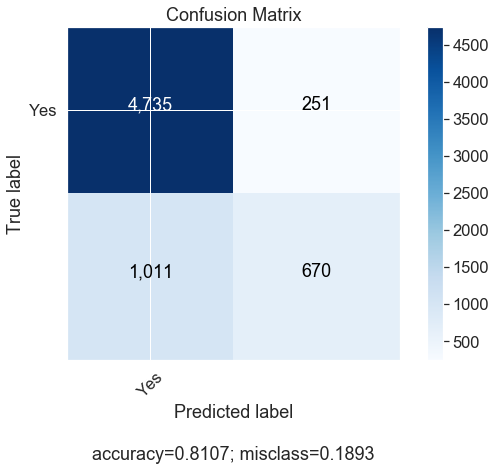

In [100]:
y_pred = tree.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = confusion_matrix(y_test, y_pred), normalize=False, target_names=['Yes'], title="Confusion Matrix")
plt.show()

### Accuracy, Precision, Recall, F1

In [101]:
print(classification_report(y_test, y_pred, target_names=['Yes', 'No']))

              precision    recall  f1-score   support

         Yes       0.82      0.95      0.88      4986
          No       0.73      0.40      0.51      1681

    accuracy                           0.81      6667
   macro avg       0.78      0.67      0.70      6667
weighted avg       0.80      0.81      0.79      6667



### True Negative Rate, False Positive Rate

In [102]:
tn, fp, fn, tp = matrix.ravel()
TNR = tn / (tn + fp)
FPR = fp / (tn + fp)
print('True Negative Rate:', TNR)
print('False Positive Rate:', FPR)

True Negative Rate: 0.9496590453269154
False Positive Rate: 0.05034095467308464


### Mathews correlation coefficient

In [103]:
print('Коэффициент Мэттьюса:', matthews_corrcoef(y_test, y_pred))

Коэффициент Мэттьюса: 0.43824321566238855


### Cohen's Kappa

In [104]:
print('Каппа Коэна:', cohen_kappa_score(y_test, y_pred))

Каппа Коэна: 0.40960802271707264


### Balanced Accuracy

In [105]:
print('Сбалансированная точность:', balanced_accuracy_score(y_test, y_pred))

Сбалансированная точность: 0.6741156618663131


### AUC-ROC

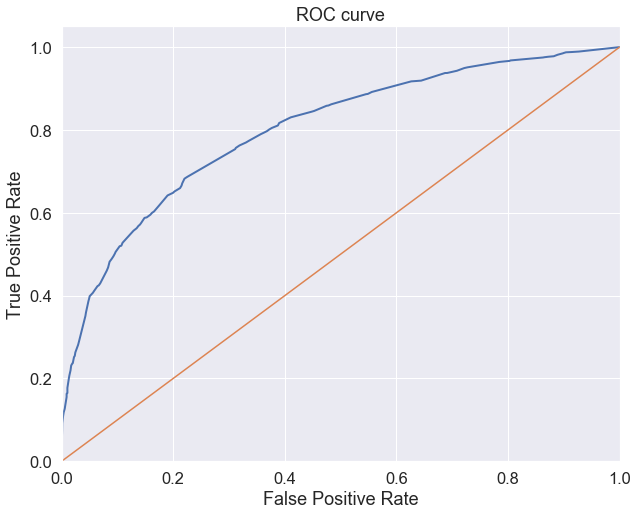

In [106]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [107]:
print('Площадь под кривой:', roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))

Площадь под кривой: 0.800492240856194


## Сравнение метрик качества классификации дерева на сбалансированном и не сбалансированном дата сетах

In [108]:
balanced_tree = DecisionTreeClassifier(criterion=criterion, max_depth=depth, min_samples_leaf=leafs, class_weight='balanced')
balanced_tree.fit(X_train, y_train)
balanced_preds = balanced_tree.predict(X_test)

### Accuracy, Precision, Recall, F1

In [109]:
print('Несбалансированная выборка:')
print(classification_report(y_test, y_pred, target_names=['Yes', 'No']))
print()
print('Сбалансированная выборка:')
print(classification_report(y_test, balanced_preds, target_names=['Yes', 'No']))

Несбалансированная выборка:
              precision    recall  f1-score   support

         Yes       0.82      0.95      0.88      4986
          No       0.73      0.40      0.51      1681

    accuracy                           0.81      6667
   macro avg       0.78      0.67      0.70      6667
weighted avg       0.80      0.81      0.79      6667


Сбалансированная выборка:
              precision    recall  f1-score   support

         Yes       0.88      0.78      0.83      4986
          No       0.51      0.67      0.58      1681

    accuracy                           0.76      6667
   macro avg       0.69      0.73      0.70      6667
weighted avg       0.78      0.76      0.77      6667



### True Negative Rate, False Positive Rate

In [110]:
print('Несбалансировання выборка:')
print('   True Negative Rate:', TNR)
print('   False Positive Rate:', FPR)
print()

balanced_matrix = confusion_matrix(y_test, balanced_preds)
tn, fp, fn, tp = balanced_matrix.ravel()
TNR = tn / (tn + fp)
FPR = fp / (tn + fp)
print('Сбалансировання выборка:')
print('   True Negative Rate:', TNR)
print('   False Positive Rate:', FPR)

Несбалансировання выборка:
   True Negative Rate: 0.9496590453269154
   False Positive Rate: 0.05034095467308464

Сбалансировання выборка:
   True Negative Rate: 0.7823906939430405
   False Positive Rate: 0.2176093060569595


### Mathews correlation coefficient

In [111]:
print('Несбалансировання выборка:')
print('   Коэффициент Мэттьюса:', matthews_corrcoef(y_test, y_pred))
print()
print('Сбалансировання выборка:')
print('   Коэффициент Мэттьюса:', matthews_corrcoef(y_test, balanced_preds))

Несбалансировання выборка:
   Коэффициент Мэттьюса: 0.43824321566238855

Сбалансировання выборка:
   Коэффициент Мэттьюса: 0.42111900338125974


### Cohen's Kappa

In [112]:
print('Несбалансировання выборка:')
print('   Каппа Коэна:', cohen_kappa_score(y_test, y_pred))
print()
print('Сбалансировання выборка:')
print('   Каппа Коэна:', cohen_kappa_score(y_test, balanced_preds))

Несбалансировання выборка:
   Каппа Коэна: 0.40960802271707264

Сбалансировання выборка:
   Каппа Коэна: 0.4131637403806543


### Balanced Accuracy

In [113]:
print('Несбалансировання выборка:')
print('   Сбалансированная точность:', balanced_accuracy_score(y_test, y_pred))
print()
print('Сбалансировання выборка:')
print('   Сбалансированная точность:', balanced_accuracy_score(y_test, balanced_preds))

Несбалансировання выборка:
   Сбалансированная точность: 0.6741156618663131

Сбалансировання выборка:
   Сбалансированная точность: 0.7284945736223234


### Area under curve

In [114]:
print('Несбалансировання выборка:')
print('   Площадь под кривой:', roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))
print()
print('Сбалансировання выборка:')
print('   Площадь под кривой:', roc_auc_score(y_test, balanced_tree.predict_proba(X_test)[:,1]))

Несбалансировання выборка:
   Площадь под кривой: 0.800492240856194

Сбалансировання выборка:
   Площадь под кривой: 0.7998193275496196


## Вывод:
Разница в метриках качества классификатора на сбалансированном и не сблансированном дата сетах сильно разнится на разных критериях. Нельзя сказать, что результаты на сбалансированном дата сете хуже или лучше. Возможно, я применил неправильный способ балансирования.